# Project Introduction and Goal
Based on a dataset found from the UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease

Creating a prediction model for heart disease based on this dataset

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

# Importing Data + Cleaning

In [84]:
df = pd.read_csv("heartdataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The columns above are the different traits/features we can examine and train our model on. The 'target' column is the column that tells us whether the person has heart disease or not, with 0 being no and 1 being yes.

Before we train our model, we need to figure out which traits have influence on whether someone may have/get heart disease or not. 

First, let's get rid of all null values.

In [87]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Now, let's take a look at the correlation between the different traits/features with our target data.

In [88]:
correlation = df.corr()['target'].abs().sort_values(ascending = False)
correlation

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

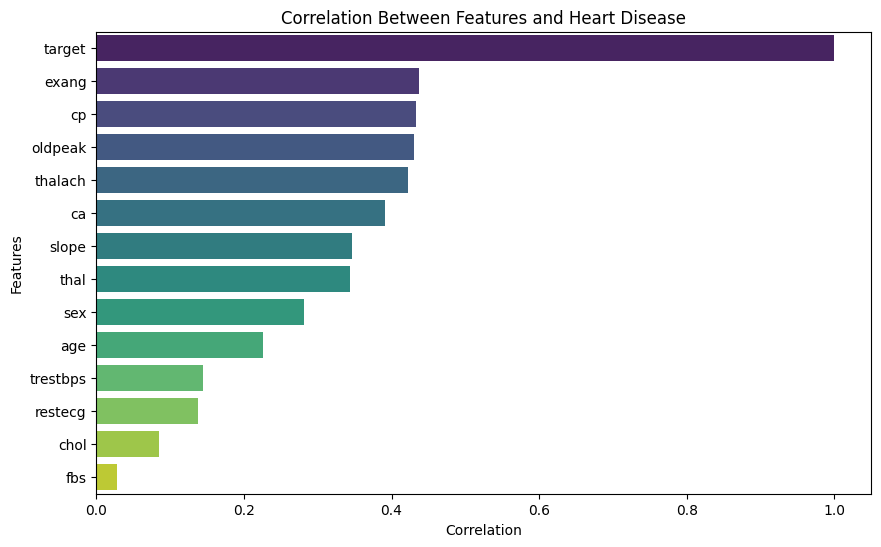

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('Correlation Between Features and Heart Disease')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

Based on the correlation coefficients, we can see that the bottom 4 have very weak correlations, the middle 5 have weak correlations, and the top 4 have moderate correlations.

# Exploratory Data Analysis (EDA)

In [90]:
target = df['target']
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Let's calculate the percentage of people with heart disease, and people without.

In [91]:
target_counts = df['target'].value_counts()
target_counts

target
1    165
0    138
Name: count, dtype: int64

In [92]:
with_percentage = (target_counts[1] / df.shape[0]) * 100
with_percentage

54.45544554455446

In [93]:
without_percentage = (target_counts[0] / df.shape[0]) * 100
without_percentage

45.54455445544555

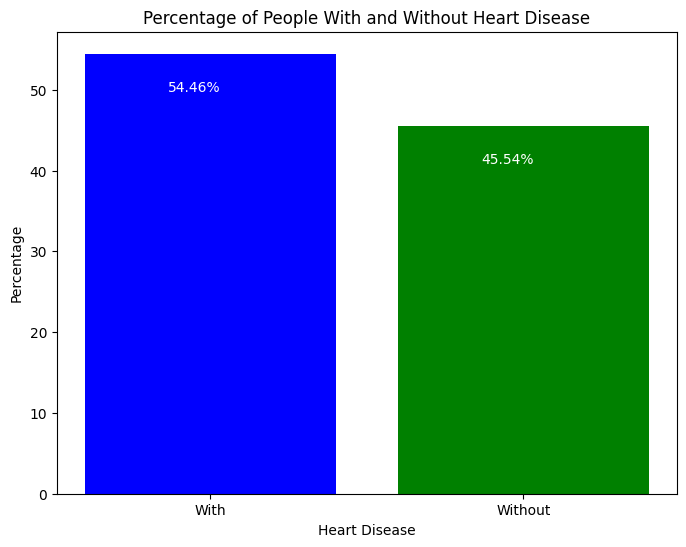

In [94]:
plt.figure(figsize = (8,6))
bars = plt.bar(['With','Without'], [with_percentage, without_percentage], color = ['blue', 'green'])

for bar, percentage in zip(bars, [with_percentage, without_percentage]):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, 
             bar.get_height() - 5, 
             f'{percentage:.2f}%', 
             va='bottom', 
             ha='center',
             color='white')

plt.xlabel('Heart Disease')
plt.ylabel('Percentage')
plt.title('Percentage of People With and Without Heart Disease')
plt.show()

Percentage of patients with heart disease: 54.56%
Percentage of patients without heart disease: 45.54%

Now, let's take a look at the age and sex statistics.
1) First, we'll see what percentage of our dataset is male and what percentage is female.
2) Next, we'll see what percentage of people with and without heart disease are male and female.
3) The third thing we'll do is look at the ages of the patients in this dataset and analyze the probability of a patient having heart disease based on their age.

### Step 1

Find the percentages of male and female patients.

In [95]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [96]:
sex_counts = df['sex'].value_counts()
sex_counts

sex
1    207
0     96
Name: count, dtype: int64

In [97]:
male_percentage = (sex_counts[1] / df.shape[0]) * 100
male_percentage

68.31683168316832

In [98]:
female_percentage = (sex_counts[0] / df.shape[0]) * 100
female_percentage

31.683168316831683

Visualize the data:

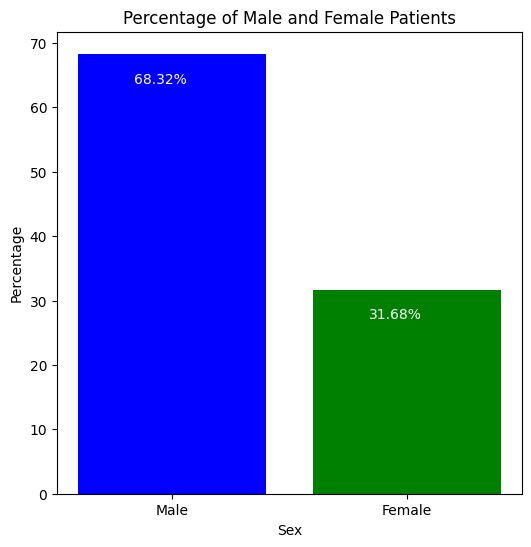

In [99]:
plt.figure(figsize=(6, 6))
bars = plt.bar(['Male', 'Female'], [male_percentage, female_percentage], color=['blue', 'green'])

for bar, percentage in zip(bars, [male_percentage, female_percentage]):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, 
             bar.get_height() - 5, 
             f'{percentage:.2f}%', 
             va='bottom', 
             ha='center',
             color='white')

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Male and Female Patients')

# Show plot
plt.show()

### Step 2

Find the percentages of male and female patients with and without heart disease.

In [100]:
sex_counts_by_target = df.groupby('target')['sex'].value_counts()
sex_counts_by_target

target  sex
0       1      114
        0       24
1       1       93
        0       72
Name: count, dtype: int64

In [101]:
total_with_heart_disease = sex_counts_by_target[1].sum()
total_with_heart_disease

165

In [102]:
male_percentage_with_heart_disease = (sex_counts_by_target[1][1] / total_with_heart_disease) * 100
male_percentage_with_heart_disease

56.36363636363636

In [103]:
female_percentage_with_heart_disease = (sex_counts_by_target[1][0] / total_with_heart_disease) * 100
female_percentage_with_heart_disease

43.63636363636363

In [104]:
total_without_heart_disease = sex_counts_by_target[0].sum()
total_without_heart_disease

138

In [105]:
male_percentage_without_heart_disease = (sex_counts_by_target[0][1] / total_without_heart_disease) * 100
male_percentage_without_heart_disease

82.6086956521739

In [106]:
female_percentage_without_heart_disease = (sex_counts_by_target[0][0] / total_without_heart_disease) * 100
female_percentage_without_heart_disease

17.391304347826086

Visualize the data:

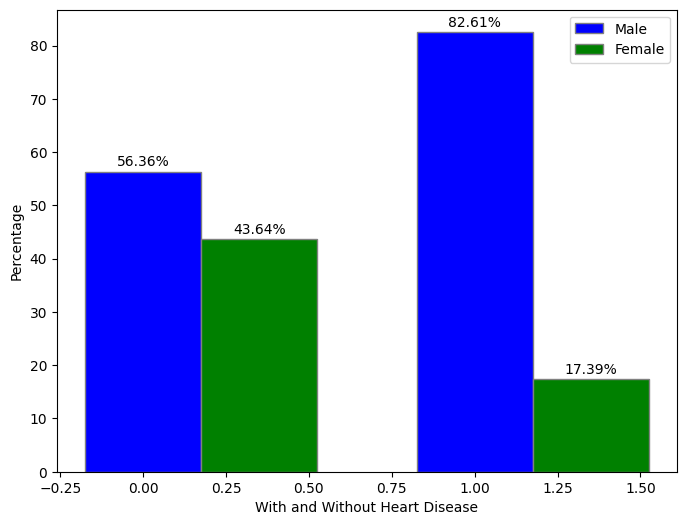

In [107]:
categories = ['With Heart Disease', 'Without Heart Disease']
male_percentages = [male_percentage_with_heart_disease, male_percentage_without_heart_disease]
female_percentages = [female_percentage_with_heart_disease, female_percentage_without_heart_disease]

bar_width = 0.35
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# create the grouped bar plot
plt.figure(figsize=(8, 6))
plt.bar(r1, male_percentages, color='blue', width=bar_width, edgecolor='grey', label='Male')
plt.bar(r2, female_percentages, color='green', width=bar_width, edgecolor='grey', label='Female')

# text labels
for i, (percentage_male, percentage_female) in enumerate(zip(male_percentages, female_percentages)):
    plt.text(r1[i], percentage_male + 1, f'{percentage_male:.2f}%', ha='center', color='black')
    plt.text(r2[i], percentage_female + 1, f'{percentage_female:.2f}%', ha='center', color='black')

plt.xlabel('With and Without Heart Disease')
plt.ylabel('Percentage')
plt.legend()

# Show plot
plt.show()

# Step 3

First, find the distribution of ages among the patients.

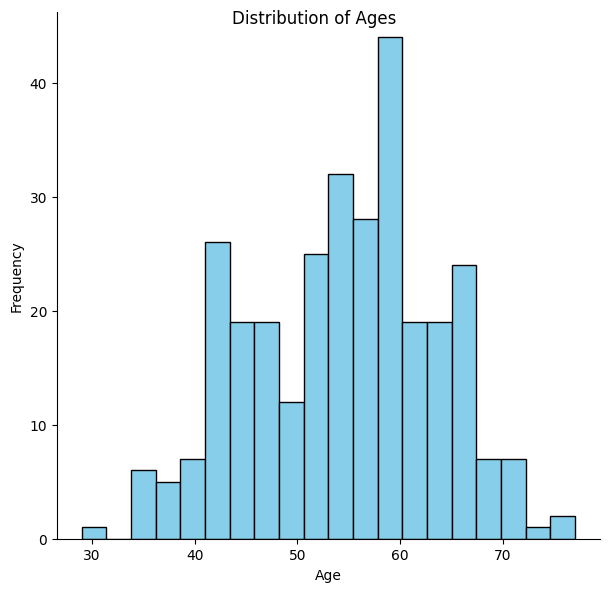

In [108]:
graph = sns.FacetGrid(df, height = 6)
graph.map(plt.hist, 'age', bins = 20, color = 'skyblue', edgecolor = 'black')

graph.set_axis_labels('Age', 'Frequency')
graph.fig.suptitle('Distribution of Ages')

plt.show()

Now, find the percentages of patients with heart disease for every age in this dataset.

In [109]:
probability_by_age = df.groupby('age')['target'].mean()
probability_by_age

age
29    1.000000
34    1.000000
35    0.500000
37    1.000000
38    0.666667
39    0.750000
40    0.333333
41    0.900000
42    0.875000
43    0.625000
44    0.727273
45    0.750000
46    0.571429
47    0.600000
48    0.571429
49    0.600000
50    0.571429
51    0.750000
52    0.692308
53    0.750000
54    0.625000
55    0.375000
56    0.454545
57    0.411765
58    0.368421
59    0.357143
60    0.272727
61    0.125000
62    0.363636
63    0.333333
64    0.600000
65    0.500000
66    0.571429
67    0.333333
68    0.500000
69    0.666667
70    0.250000
71    1.000000
74    1.000000
76    1.000000
77    0.000000
Name: target, dtype: float64

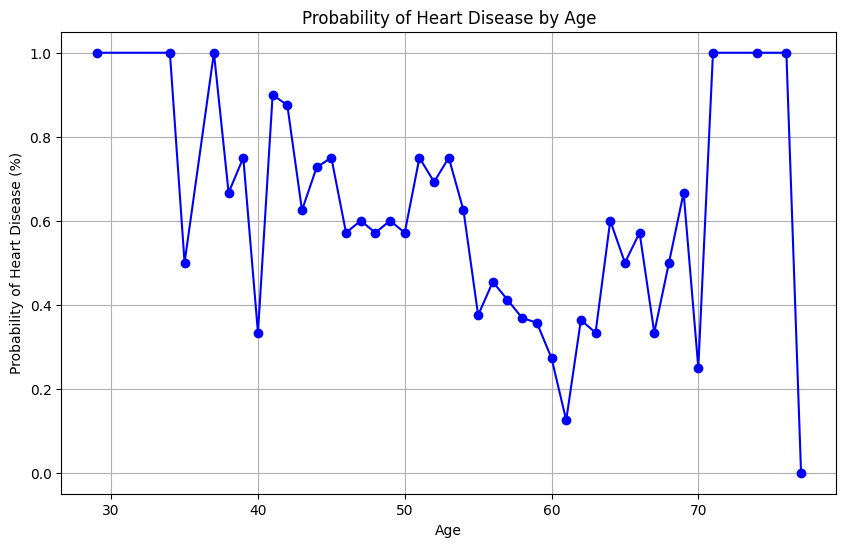

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(probability_by_age.index, probability_by_age.values, marker='o', color='b', linestyle='-')

plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease (%)')
plt.title('Probability of Heart Disease by Age')

plt.grid(True)
plt.show()


This graph shows us the probability of having heart disease based on age. However, we have to keep in mind that for some points in our data set, there are not enough points per age to have an accurate probability. For example, we only have one patient who is 71, and they have heart disease, leading to an estimated 100% chance of having heart disease at age 70, but this percentage is too high and inaccurate.

Let's also look at the frequency of heart disease for the ages, by male and female.

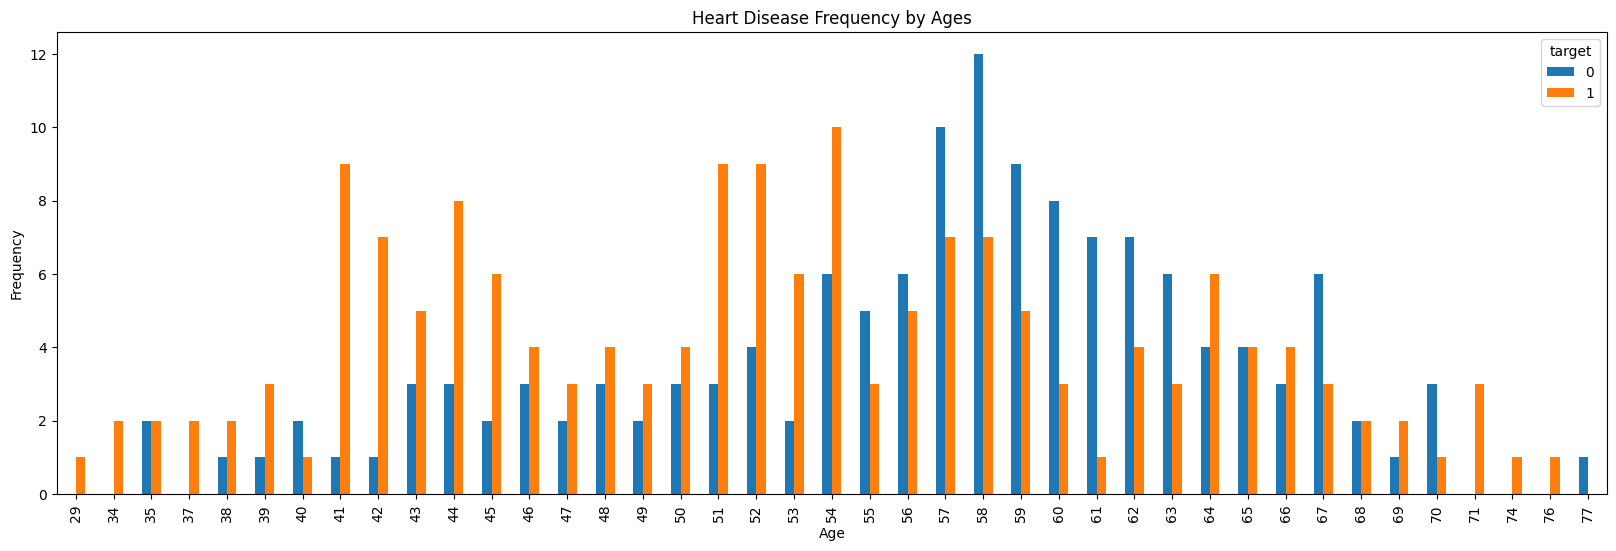

In [111]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency by Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### Further Exploratory Data Analysis
Now, let's look at the probabibility based on some of the other categories. We're going to look at some of the medical related categories:
- chest pain column (cp)
- resting blood pressure (trestbps)
- cholesterol (chol)
- fasting blood pressure (fbs)

In [112]:
probability_by_cp = df.groupby('cp')['target'].mean()
probability_by_cp

cp
0    0.272727
1    0.820000
2    0.793103
3    0.695652
Name: target, dtype: float64

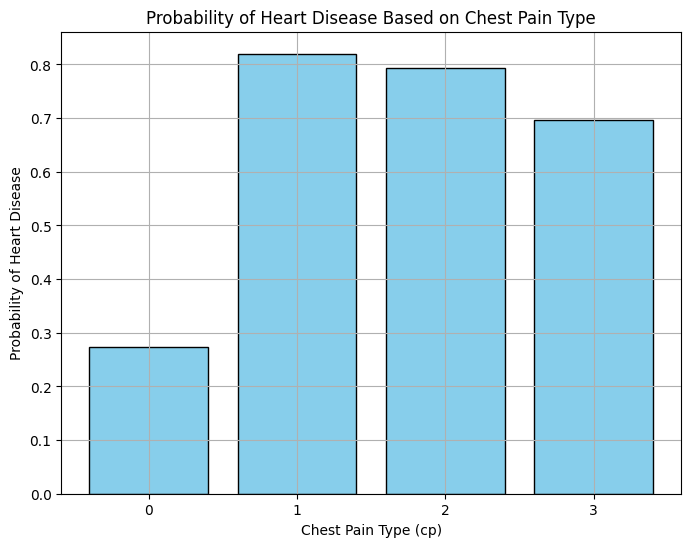

In [113]:
plt.figure(figsize=(8, 6))
plt.bar(probability_by_cp.index, probability_by_cp.values, color='skyblue', edgecolor='black')

plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease Based on Chest Pain Type')

plt.xticks(probability_by_cp.index)
plt.grid(True)
plt.show()

In [114]:
probability_by_trestbps = df.groupby('trestbps')['target'].mean()
probability_by_trestbps

trestbps
94     1.000000
100    0.500000
101    1.000000
102    1.000000
104    1.000000
105    1.000000
106    1.000000
108    0.666667
110    0.421053
112    0.555556
114    0.000000
115    1.000000
117    0.000000
118    0.714286
120    0.621622
122    0.750000
123    0.000000
124    0.333333
125    0.363636
126    0.333333
128    0.500000
129    1.000000
130    0.638889
132    0.375000
134    0.400000
135    0.833333
136    0.333333
138    0.769231
140    0.531250
142    0.666667
144    0.000000
145    0.200000
146    0.500000
148    0.500000
150    0.529412
152    0.400000
154    0.000000
155    1.000000
156    1.000000
160    0.454545
164    0.000000
165    0.000000
170    0.250000
172    1.000000
174    0.000000
178    0.500000
180    0.333333
192    0.000000
200    0.000000
Name: target, dtype: float64

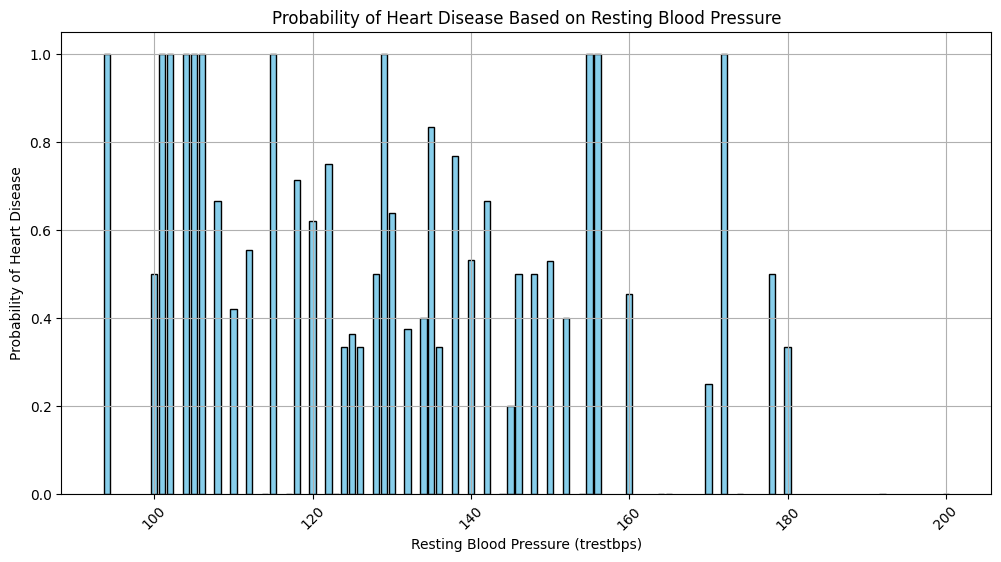

In [115]:
plt.figure(figsize=(12, 6))
plt.bar(probability_by_trestbps.index, probability_by_trestbps.values, color='skyblue', edgecolor='black')

plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease Based on Resting Blood Pressure')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [116]:
probability_by_chol = df.groupby('chol')['target'].mean()
probability_by_chol

chol
126    1.0
131    0.0
141    1.0
149    0.5
157    1.0
      ... 
394    1.0
407    0.0
409    0.0
417    1.0
564    1.0
Name: target, Length: 152, dtype: float64

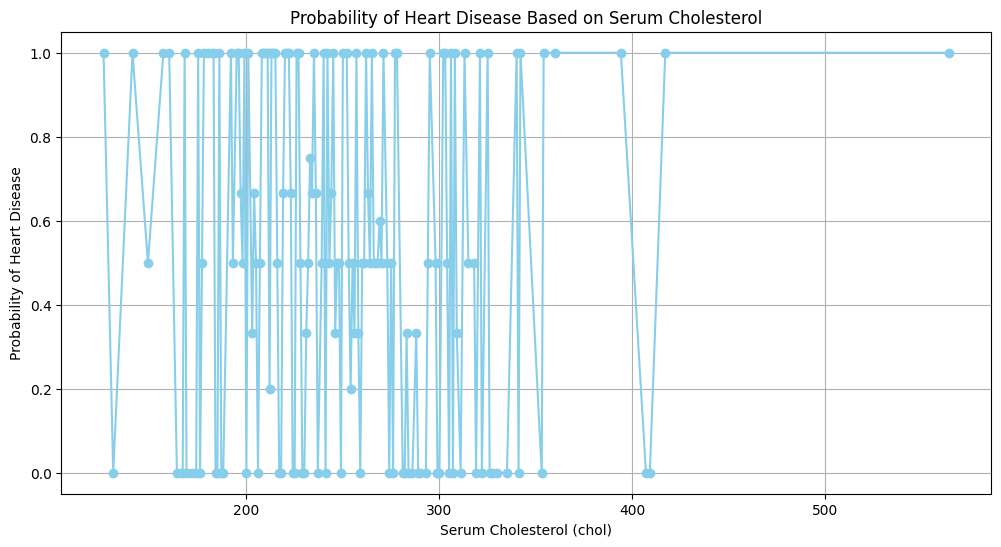

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(probability_by_chol.index, probability_by_chol.values, marker='o', color='skyblue', linestyle='-')

plt.xlabel('Serum Cholesterol (chol)')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease Based on Serum Cholesterol')

plt.grid(True)
plt.show()

In [118]:
probability_by_fbs = df.groupby('fbs')['target'].mean()
probability_by_fbs

fbs
0    0.550388
1    0.511111
Name: target, dtype: float64

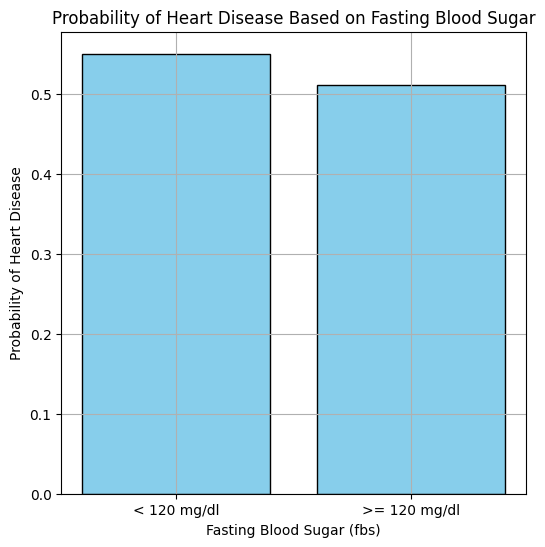

In [119]:
plt.figure(figsize=(6, 6))
plt.bar(probability_by_fbs.index, probability_by_fbs.values, color='skyblue', edgecolor='black')

plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease Based on Fasting Blood Sugar')

plt.xticks(probability_by_fbs.index, ['< 120 mg/dl', '>= 120 mg/dl'])
plt.grid(True)
plt.show()

### Analyzing thalassemia
Thalassemia is an inherited genetic blood disorder that causes your body to produce less hemoglobin than normal. Hemoglobin is what allows red blood cells to carry oxygen, so having too little of this can cause anemia, weakness, fatique, etc.

In [120]:
probability_by_thal = df.groupby('thal')['target'].mean()
probability_by_thal

thal
0    0.500000
1    0.333333
2    0.783133
3    0.239316
Name: target, dtype: float64

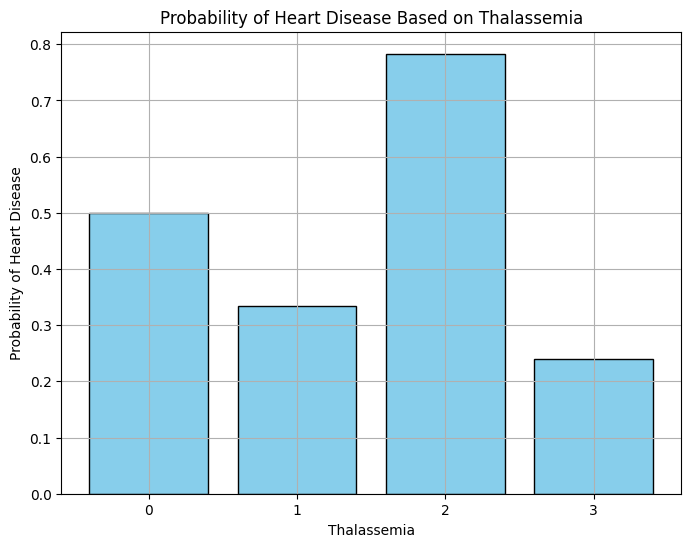

In [121]:
plt.figure(figsize=(8, 6))
plt.bar(probability_by_thal.index, probability_by_thal.values, color='skyblue', edgecolor='black')

plt.xlabel('Thalassemia')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease Based on Thalassemia')

plt.xticks(probability_by_thal.index)
plt.grid(True)
plt.show()

### Analyzing Correlation

In [122]:
categories = ['age','sex', 'cp','trestbps','chol','fbs']

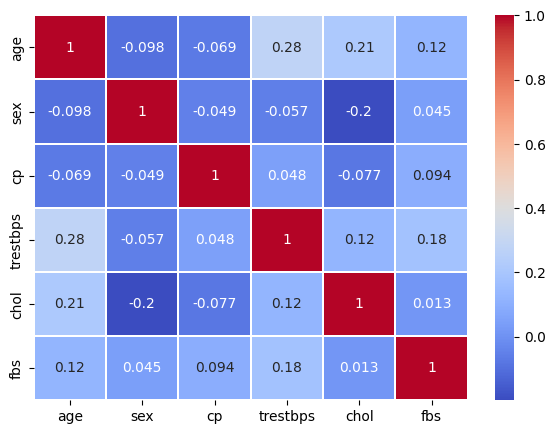

In [123]:
f, ax = plt.subplots(figsize=(7, 5))

df_corr = df.loc[:,categories]
corr = df_corr.corr()

sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [124]:
df_corr = df.loc[:, categories]
df_corr

,age,sex,cp,trestbps,chol,fbs
0,63,1,3,145,233,1
1,37,1,2,130,250,0
2,41,0,1,130,204,0
3,56,1,1,120,236,0
4,57,0,0,120,354,0
...,...,...,...,...,...,...
298,57,0,0,140,241,0
299,45,1,3,110,264,0
300,68,1,0,144,193,1
301,57,1,0,130,131,0


# Training the Model

First, we need to split the dataset into the training and testing set by an 80-20 split.

In [125]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

Now, we can get started on training our model. The goal we set out to achieve at the beginning of this project was to be able to predict heart disease in patients accurately. In order to do this as accurately as we can, we need to test different algorithms and then compare which has the highest accuracy. There are many algorithms we can test and choose from, but for right now, the three we will be testing are:
- logistic regression
- random forest
- naive bayes

### Classification Model
First, we'll train a classification model and evaluate its performance on the train and test sets. 

Parameters:
- clf (classifier): the classification algorithm to be trained and evaluated
- X_train (DataFrame): the features of the training data
- Y_train (Series): the target variable of the training data
- X_test (DataFrame): the feaures of the testing data
- Y_test (Series): The target variable of the testing data

Returns:
- training_predictions
- testing_predictions
- train_acc: the accuracy of the model on the training data
- test_acc: the accuracy of the model on the testing data

In [126]:
from sklearn.metrics import accuracy_score

def training_model(clf, X_train, Y_train, X_test, Y_test):
    # train the classifier
    clf.fit(X_train, Y_train)

    # predictions on training and testing data
    training_predictions = clf.predict(X_train)
    testing_predictions = clf.predict(X_test)
    
    return training_predictions, testing_predictions

### Evaluation Model
When evaluating the performance of each of these algorithms on the train and test sets, here are the key statistics and metrics we will analyze:
- confusion matrix
- accuracy
- precision
- recall (sensitivity)
- F1 score
- ROC curve and AUC score
- Classification Report

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

def evaluate_model(Y_train, training_predictions, Y_test, testing_predictions):
    # Compute various metrics
    train_conf_matrix = confusion_matrix(Y_train, training_predictions)
    test_conf_matrix = confusion_matrix(Y_test, testing_predictions)
    
    train_accuracy = accuracy_score(Y_train, training_predictions)
    test_accuracy = accuracy_score(Y_test, testing_predictions)
    
    train_precision = precision_score(Y_train, training_predictions)
    test_precision = precision_score(Y_test, testing_predictions)
    
    train_recall = recall_score(Y_train, training_predictions)
    test_recall = recall_score(Y_test, testing_predictions)
    
    train_f1 = f1_score(Y_train, training_predictions)
    test_f1 = f1_score(Y_test, testing_predictions)
    
    train_classification_report = classification_report(Y_train, training_predictions)
    test_classification_report = classification_report(Y_test, testing_predictions)
    
    # Compute ROC curve and AUC score
    fpr_train, tpr_train, _ = roc_curve(Y_train, training_predictions)
    auc_train = roc_auc_score(Y_train, training_predictions)
    
    fpr_test, tpr_test, _ = roc_curve(Y_test, testing_predictions)
    auc_test = roc_auc_score(Y_test, testing_predictions)
    
    return (train_conf_matrix, test_conf_matrix), \
           (train_accuracy, test_accuracy), \
           (train_precision, test_precision), \
           (train_recall, test_recall), \
           (train_f1, test_f1), \
           train_classification_report, test_classification_report, \
           (fpr_train, tpr_train, auc_train), \
           (fpr_test, tpr_test, auc_test)

### Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(max_iter = 1000)

training_predictions_logreg, testing_predictions_logreg = \
    training_model(logistic_reg, X_train, Y_train, X_test, Y_test)

In [129]:
(train_conf_matrix_logreg, test_conf_matrix_logreg), \
(train_accuracy_logreg, test_accuracy_logreg), \
(train_precision_logreg, test_precision_logreg), \
(train_recall_logreg, test_recall_logreg), \
(train_f1_logreg, test_f1_logreg), \
train_classification_report_logreg, \
test_classification_report_logreg, \
(fpr_train_logreg, tpr_train_logreg, auc_train_logreg), \
(fpr_test_logreg, tpr_test_logreg, auc_test_logreg) = \
evaluate_model(Y_train, training_predictions_logreg, Y_test, testing_predictions_logreg)


Confusion Matrix:

<Axes: >

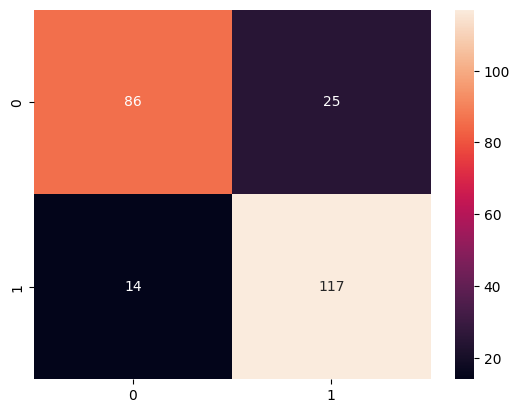

In [130]:
sns.heatmap(train_conf_matrix_logreg, annot = True, fmt = "d")

<Axes: >

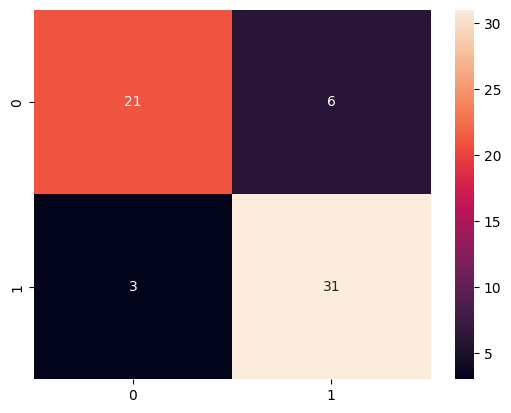

In [131]:
sns.heatmap(test_conf_matrix_logreg, annot = True, fmt = "d")

Accuracy:

In [132]:
train_accuracy_logreg

0.8388429752066116

In [133]:
test_accuracy_logreg

0.8524590163934426

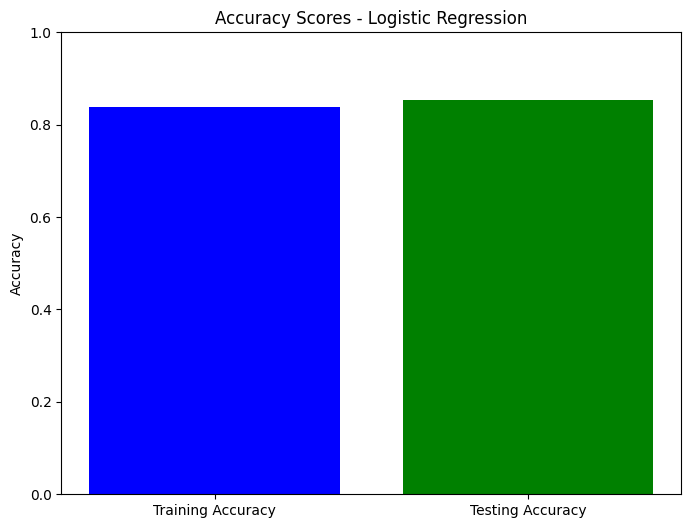

In [134]:
labels = ['Training Accuracy', 'Testing Accuracy']
logreg_scores = [train_accuracy_logreg, test_accuracy_logreg]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, logreg_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Logistic Regression')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()

Precision score:

In [135]:
train_precision_logreg

0.823943661971831

In [136]:
test_precision_logreg

0.8378378378378378

Recall:

In [137]:
train_recall_logreg

0.8931297709923665

In [138]:
test_recall_logreg

0.9117647058823529

F1-score:

In [139]:
train_f1_logreg

0.8571428571428571

In [140]:
test_f1_logreg

0.8732394366197183

ROC curve and AUC score:

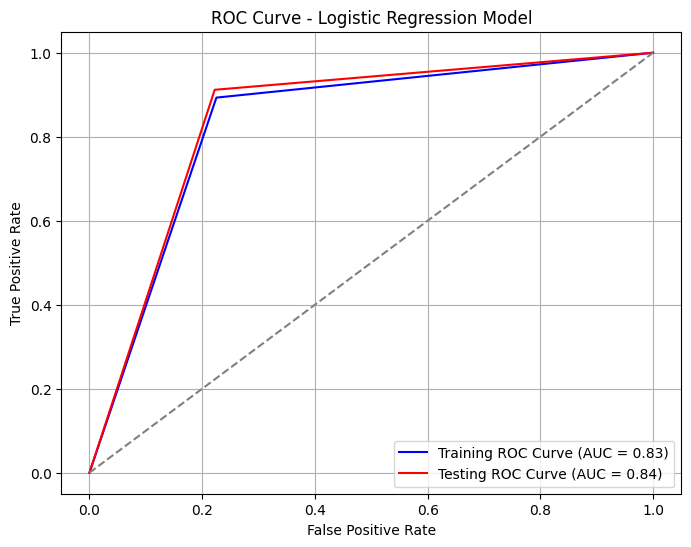

In [141]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_logreg, tpr_train_logreg, color='blue', label=f'Training ROC Curve (AUC = {auc_train_logreg:.2f})')
plt.plot(fpr_test_logreg, tpr_test_logreg, color='red', label=f'Testing ROC Curve (AUC = {auc_test_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:

In [142]:
train_classification_report_logreg

'              precision    recall  f1-score   support\n\n           0       0.86      0.77      0.82       111\n           1       0.82      0.89      0.86       131\n\n    accuracy                           0.84       242\n   macro avg       0.84      0.83      0.84       242\nweighted avg       0.84      0.84      0.84       242\n'

In [143]:
test_classification_report_logreg

'              precision    recall  f1-score   support\n\n           0       0.88      0.78      0.82        27\n           1       0.84      0.91      0.87        34\n\n    accuracy                           0.85        61\n   macro avg       0.86      0.84      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

### Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

training_predictions_rf, testing_predictions_rf = \
    training_model(random_forest, X_train, Y_train, X_test, Y_test)

In [145]:
(train_conf_matrix_rf, test_conf_matrix_rf), \
(train_accuracy_rf, test_accuracy_rf), \
(train_precision_rf, test_precision_rf), \
(train_recall_rf, test_recall_rf), \
(train_f1_rf, test_f1_rf), \
train_classification_report_rf, \
test_classification_report_rf, \
(fpr_train_rf, tpr_train_rf, auc_train_rf), \
(fpr_test_rf, tpr_test_rf, auc_test_rf) = \
evaluate_model(training_predictions_rf, Y_train, testing_predictions_rf, Y_test)

Confusion Matrix:

<Axes: >

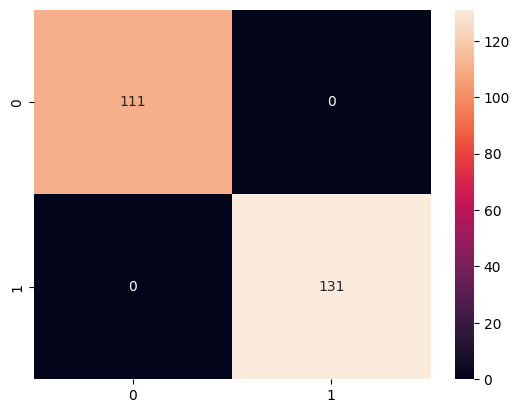

In [146]:
sns.heatmap(train_conf_matrix_rf, annot = True, fmt = "d")

<Axes: >

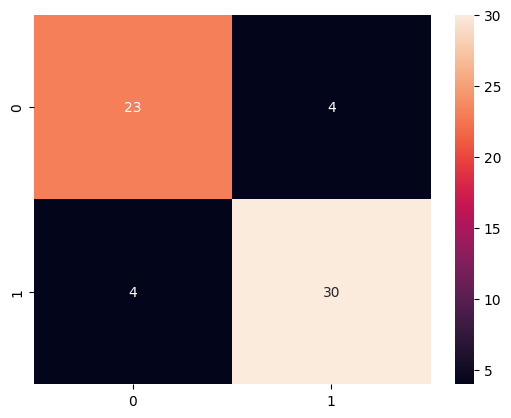

In [147]:
sns.heatmap(test_conf_matrix_rf, annot = True, fmt = "d")

Accuracy:

In [148]:
train_accuracy_rf

1.0

In [149]:
test_accuracy_rf

0.8688524590163934

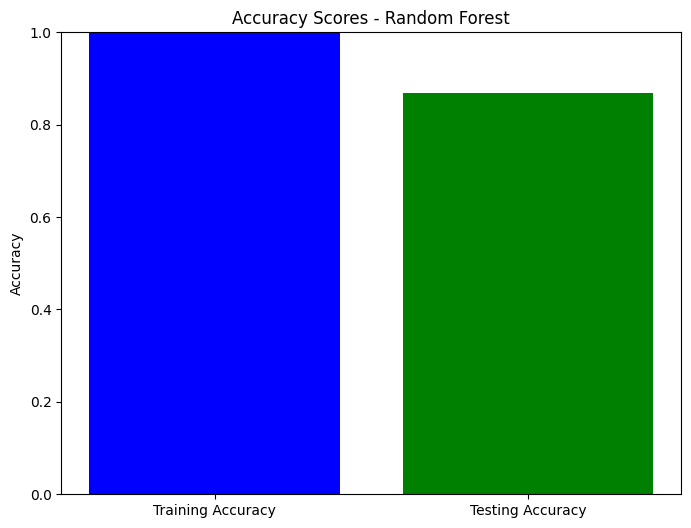

In [150]:
labels = ['Training Accuracy', 'Testing Accuracy']
logreg_scores = [train_accuracy_rf, test_accuracy_rf]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, logreg_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Random Forest')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()

Precision score:

In [151]:
train_precision_rf

1.0

In [152]:
test_precision_rf

0.8823529411764706

Recall:

In [153]:
train_recall_rf

1.0

In [154]:
test_recall_rf

0.8823529411764706

F1-score:

In [155]:
train_f1_rf

1.0

In [156]:
test_f1_rf

0.8823529411764706

ROC curve and AUC score:

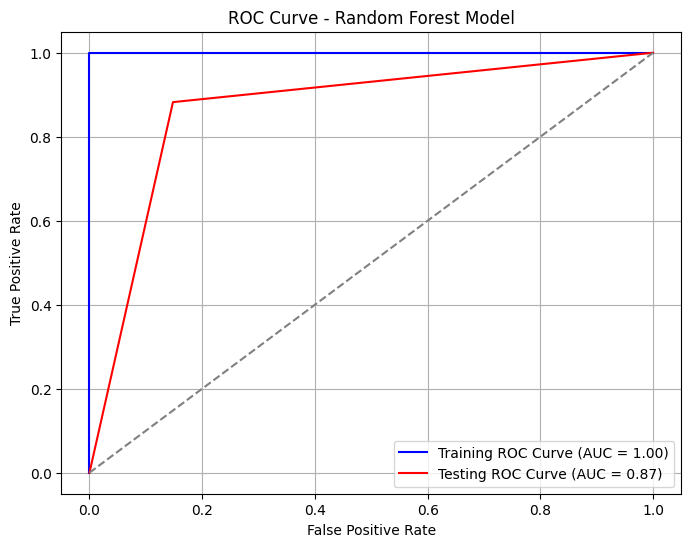

In [157]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, color='blue', label=f'Training ROC Curve (AUC = {auc_train_rf:.2f})')
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=f'Testing ROC Curve (AUC = {auc_test_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:

In [158]:
train_classification_report_rf

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       111\n           1       1.00      1.00      1.00       131\n\n    accuracy                           1.00       242\n   macro avg       1.00      1.00      1.00       242\nweighted avg       1.00      1.00      1.00       242\n'

In [159]:
test_classification_report_rf

'              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85        27\n           1       0.88      0.88      0.88        34\n\n    accuracy                           0.87        61\n   macro avg       0.87      0.87      0.87        61\nweighted avg       0.87      0.87      0.87        61\n'

### Naive Bayes

In [160]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

training_predictions_nb, testing_predictions_nb = \
    training_model(naive_bayes, X_train, Y_train, X_test, Y_test)

In [161]:
(train_conf_matrix_nb, test_conf_matrix_nb), \
(train_accuracy_nb, test_accuracy_nb), \
(train_precision_nb, test_precision_nb), \
(train_recall_nb, test_recall_nb), \
(train_f1_nb, test_f1_nb), \
train_classification_report_nb, \
test_classification_report_nb, \
(fpr_train_nb, tpr_train_nb, auc_train_nb), \
(fpr_test_nb, tpr_test_nb, auc_test_nb) = \
evaluate_model(training_predictions_nb, Y_train, testing_predictions_nb, Y_test)

Confusion Matrix:

<Axes: >

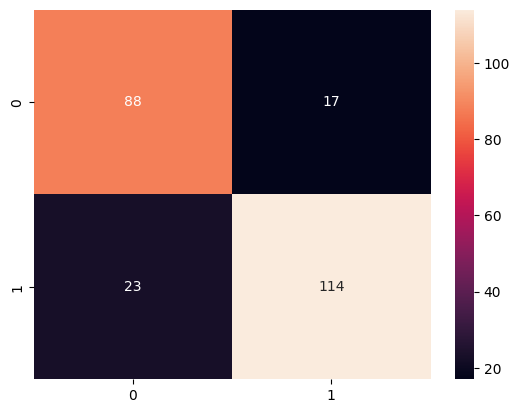

In [162]:
sns.heatmap(train_conf_matrix_nb, annot = True, fmt = "d")

<Axes: >

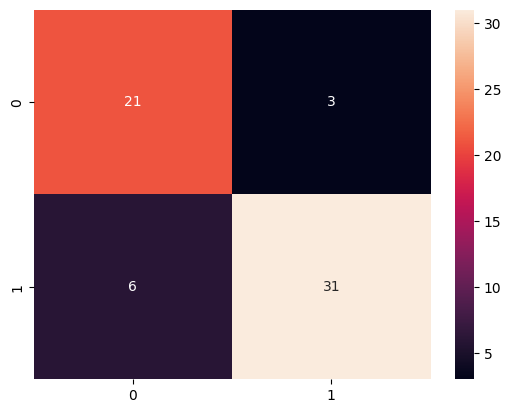

In [163]:
sns.heatmap(test_conf_matrix_nb, annot = True, fmt = "d")

Accuracy:

In [164]:
train_accuracy_nb

0.8347107438016529

In [165]:
test_accuracy_nb

0.8524590163934426

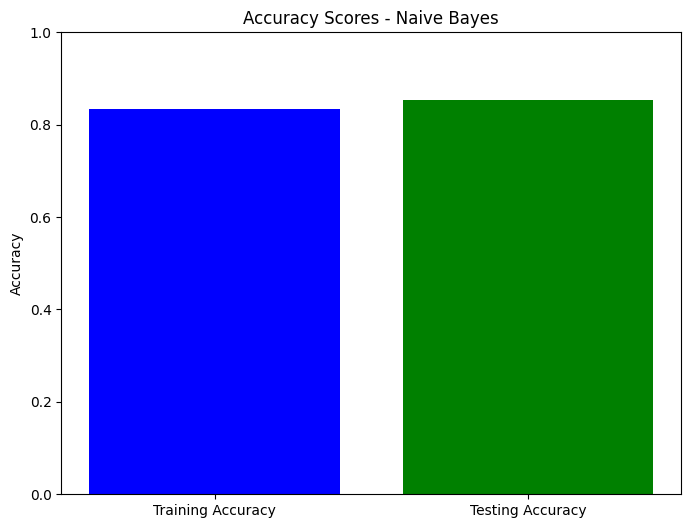

In [166]:
labels = ['Training Accuracy', 'Testing Accuracy']
logreg_scores = [train_accuracy_nb, test_accuracy_nb]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, logreg_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Naive Bayes')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()

Precision Score:

In [167]:
train_precision_nb

0.8702290076335878

In [168]:
test_precision_nb

0.9117647058823529

Recall:

In [169]:
train_recall_nb

0.8321167883211679

In [170]:
test_recall_nb

0.8378378378378378

F1-score:

In [171]:
train_f1_nb

0.8507462686567164

In [172]:
test_f1_nb

0.8732394366197183

ROC curve and AUC score:

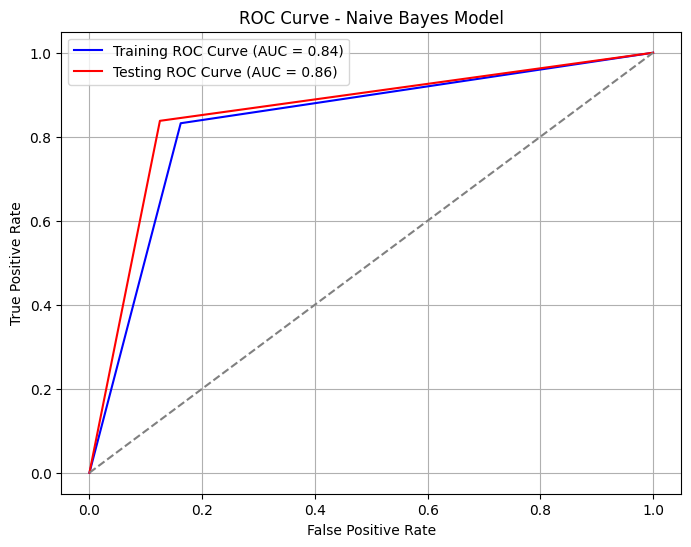

In [173]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_nb, tpr_train_nb, color='blue', label=f'Training ROC Curve (AUC = {auc_train_nb:.2f})')
plt.plot(fpr_test_nb, tpr_test_nb, color='red', label=f'Testing ROC Curve (AUC = {auc_test_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Model')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:

In [174]:
train_classification_report_nb

'              precision    recall  f1-score   support\n\n           0       0.79      0.84      0.81       105\n           1       0.87      0.83      0.85       137\n\n    accuracy                           0.83       242\n   macro avg       0.83      0.84      0.83       242\nweighted avg       0.84      0.83      0.84       242\n'

In [175]:
test_classification_report_nb

'              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.82        24\n           1       0.91      0.84      0.87        37\n\n    accuracy                           0.85        61\n   macro avg       0.84      0.86      0.85        61\nweighted avg       0.86      0.85      0.85        61\n'

### Comparing Accuracy
Now, we're going to compare the accuracy results from the three different algorithms we used.

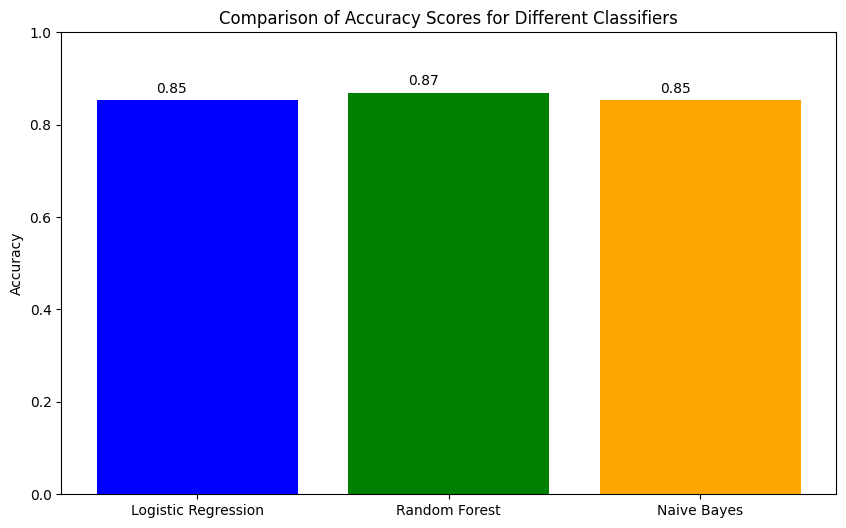

In [178]:
classifiers = ['Logistic Regression', 'Random Forest', 'Naive Bayes']
accuracy_scores = [test_accuracy_logreg, test_accuracy_rf, test_accuracy_nb]

plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores for Different Classifiers')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1

# Add text labels to the bars
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom', color='black')

plt.show()

So the Random Forest algorithm is the most accurate in this situation, with Logistic Regression and Naive Bayes being relatively the same. 

### Next steps:
1) Continue to train our model further and increase accuracy for all classifiers, or for one specific classifier.
2) Further analyze correlations between features and having heart disease.